In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
td = pd.read_csv('C:\\Users\\saket\\Desktop\\Online Courses\\Python code\\Titanic\\train.csv')

In [34]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
td.drop(['Name'],axis = 1,inplace = True)
td.drop(['Cabin'],axis = 1,inplace=True)
td.drop(['Ticket'],axis = 1,inplace=True)

In [37]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [25]:
td.dropna(inplace=True)
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB
None


In [38]:
#Dummy data
dummies = []
cols = ['Sex','Embarked','Pclass']
for col in cols:
    dummies.append(pd.get_dummies(td[col]))

In [39]:
td_dummies = pd.concat(dummies,axis = 1)

In [40]:
td_dummies.head()

,female,male,C,Q,S,1,2,3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [41]:
td = pd.concat((td,td_dummies),axis = 1)

In [42]:
td = td.drop(['Sex','Embarked','Pclass'],axis = 1)

In [43]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.8 KB


In [44]:
td['Age'] = td['Age'].interpolate()

In [45]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.8 KB


In [53]:
X = td.iloc[:,td.columns!='Survived']
y = td.iloc[:,td.columns=='Survived']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [77]:
new_cols = td_X.columns.values.tolist()
to_keep = [i for i in new_cols if i not in columns]

In [78]:
print(to_keep)

['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']


In [79]:
data1 = td_X[to_keep]

In [80]:
td_X = pd.concat([data1,td],axis=1)

In [81]:
td_X.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,0,1,0,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,0,1,0,0,1,0,0,1,1,female,38.0,1,0,71.2833,C
2,1,0,0,0,1,0,0,1,1,3,female,26.0,0,0,7.9250,S
3,1,0,0,0,1,1,0,0,1,1,female,35.0,1,0,53.1000,S
4,0,1,0,0,1,0,0,1,0,3,male,35.0,0,0,8.0500,S


In [82]:
td_X.drop(['Sex','Embarked','Pclass'],axis=1,inplace = True)

In [83]:
td_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Survived      891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
dtypes: float64(2), int64(2), object(1), uint8(8)
memory usage: 41.8+ KB


In [92]:
X = td_X.iloc[:,td_X.columns!='Survived']
y = td_X.iloc[:,td_X.columns=='Survived']

In [89]:
td_X.dropna(inplace=True)

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

C:\Users\saket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
pred = lr.predict(X)

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y,pred)
print(cm)

accuracy = accuracy_score(y,pred)
print(accuracy)

[[365  59]
 [ 82 208]]
0.8025210084033614


In [101]:
test_data = pd.read_csv('C:\\Users\\saket\\Desktop\\Online Courses\\Python code\\Titanic\\test.csv')

In [102]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
#test_data.drop(['Name','Cabin'],axis = 1,inplace = True)
data = test_data[['Pclass','Sex','Embarked']]
encoded_test_data = one_hot_encode(data)

In [109]:
test_dataset = pd.concat([test_data,encoded_test_data],axis = 1)

In [112]:
test_dataset.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [111]:
test_dataset.drop(['PassengerId','Sex','Pclass','Ticket','Embarked'],axis = 1,inplace = True)

In [114]:
test_dataset.dropna(inplace = True)

In [115]:
y_pred = lr.predict(test_dataset)

In [118]:
y_pred = pd.DataFrame(data = y_pred,columns = ['Survived'])

In [119]:
y_pred.head()

,Survived
0,1
1,1
2,1
3,1
4,1


In [120]:
Predicted_Output = pd.concat([test_data['PassengerId'],y_pred],axis = 1)

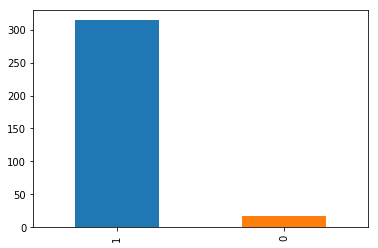

In [123]:
Predicted_Output.Survived.value_counts().plot(kind = 'bar')

In [124]:
Predicted_Output.to_csv('C:\\Users\\saket\\Desktop\\Online Courses\\Python code\\Titanic\\Predictions.csv',sep = ',')